In [1]:
import numpy as np
n = 5
x = np.random.uniform(-10,10,n)
# x = np.ndarray((10,), buffer=np.array([-10,-8,-6,-4,-2,0,2,4,6,8]),dtype=int)
print(type(x))
print(x)
#### DATA SET 1 #####
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
y = sigmoid(x)

#### DATA SET 2 #####

# y = np.exp(x)

<class 'numpy.ndarray'>
[ 5.21269911  4.79647837 -7.52705776  7.36510405  8.71957746]


(5, 4)
[[   1.            5.21269911   27.17223198  141.64066935]
 [   1.            4.79647837   23.00620476  110.34876353]
 [   1.           -7.52705776   56.65659858 -426.45749016]
 [   1.            7.36510405   54.24475774  399.51828514]
 [   1.            8.71957746   76.03103104  662.9584644 ]]
(101, 4)
(5, 4)
(101, 4)
(101, 4)
(101, 4)


C:\Users\erick\AppData\Local\Temp\ipykernel_16832\1641448793.py:25: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_solution = np.linalg.lstsq(a,y) #change this line


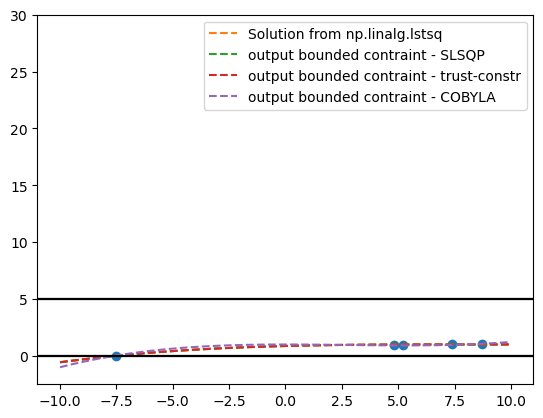

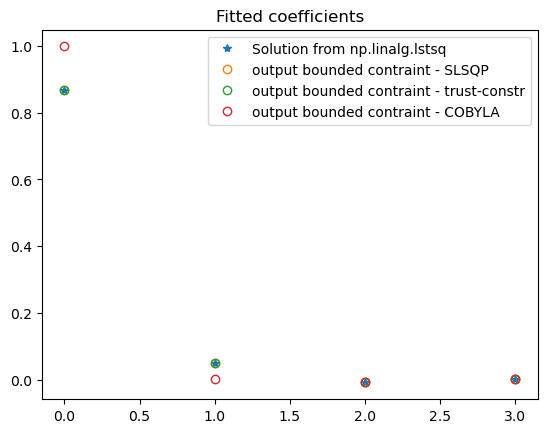

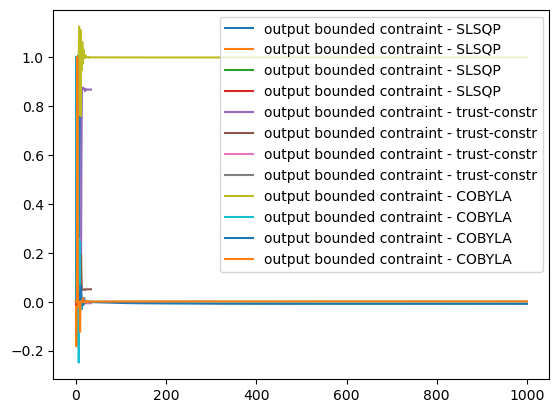

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
# from pyswarm import pso
from scipy import optimize



plt.figure(1)
plt.plot(x,y,'o')

def make_matrix(x,k = 6):
    a = list()
    for i in range(k):
        a.append(x ** i)
    a = np.array(a).T
    print(a.shape)
    return a
# a = np.vstack([x,np.ones(len(x))]).T

Korder = 4
a = make_matrix(x,Korder)
print(a)
from scipy.linalg import solve
x_solution = np.linalg.lstsq(a,y) #change this line
# print(x_solution,b)
# plt.plot(x, y, 'o', label='Original data', markersize=10)
# plt.plot(x, a*x_solution + b, 'r', label='Fitted line')
# plt.legend()
# plt.show()

c = x_solution[0]
plt.figure(2)
plt.title('Fitted coefficients')
plt.plot(c,'*',label='Solution from np.linalg.lstsq')
xtest = np.linspace(-10,10,101)
a = make_matrix(xtest, k=Korder)
ytest = a.dot(c)
plt.figure(1)
plt.plot(xtest,ytest,'--',label='Solution from np.linalg.lstsq')

###########################################

def norm2_sq(x,A,b):
  return np.linalg.norm(A.dot(x) - b)**2# ||Ax - b||^2

# solve argmin || Ax - b ||^2
A = make_matrix(x,k=Korder)
history = []
def save_xk(x):
  history.append(x)

def save_xk_trust_constr(x, state):
  history.append(x)

LB = 0
UB = 5

def plot_result(coeff, history, label):
  plt.figure(1)
  xtest = np.linspace(-10,10,101)
  Atest = make_matrix(xtest,Korder)
  plt.plot(xtest,Atest.dot(coeff),'--',label=label)
  plt.legend()
  plt.axhline(y=UB,c='k')
  plt.axhline(y=LB,c='k')
  low = -0.5 if LB == 0 else LB - np.abs(0.2*LB)
  hi = 0.5 if UB == 0 else UB + np.abs(0.2*UB)
  plt.ylim(5*np.array([low,hi]))
  plt.figure(2)
  plt.plot(coeff,'o',fillstyle='none',label=label)
  plt.legend()
  plt.figure(3)
  plt.plot(np.array(history),label=label)
  plt.legend()
# non-constraint
# result = optimize.minimize(norm2_sq, x0 = np.zeros(Korder), method = 'Nelder-Mead', tol=1e-9, callback = save_xk, args = (A,y))
# plot_result(result['x'],history, 'optimize.minimize unconstraint')

# 1. output-contraint -1 < y = A*x < 1
LB, UB = 0, 5
from scipy.optimize import NonlinearConstraint
def output(x):
  global A
  return A.dot(x)
# ybound_constr = NonlinearConstraint(output,0,1)
# result = optimize.minimize(norm2_sq, x0 = np.zeros(Korder), method = 'trust-constr',tol=1e-9, callback = save_xk_trust_constr, args = (A,y), constraints=[ybound_constr])
# cf = result['x']
# plot_result(result['x'],history,'ouput bounded contraint - trust-constr')

# 2. output constraint
names = ['SLSQP','trust-constr','COBYLA']
for n in names:
  # history = []
  if n == 'trust-constr':
    y_constraints = [NonlinearConstraint(output,LB,UB)]
    cb = save_xk_trust_constr
  else:
    lower_bound = {'type': 'ineq',
              'fun' : lambda x: output(x)-LB
              }

    upper_bound = {'type': 'ineq',
              'fun' : lambda x: UB-output(x)
              }
    y_constraints = [lower_bound,upper_bound]
    cb = save_xk
  result = optimize.minimize(norm2_sq, x0 = np.zeros(Korder), method = n,tol=1e-9, callback = cb, args = (A,y), constraints=y_constraints)
  cf = result['x']
  plot_result(result['x'],history,'output bounded contraint - '+n)
  np.save('history_'+n+'.npy',np.array(history))
  history = []
  np.save('coeff_'+n+'.npy',cf)
  
# data should be stored separately

[ 9.98476476e-01  7.09106744e-04 -8.88233929e-03  1.10478761e-03]
0
(101, 4)
(101, 4)
(101, 4)
(101, 4)


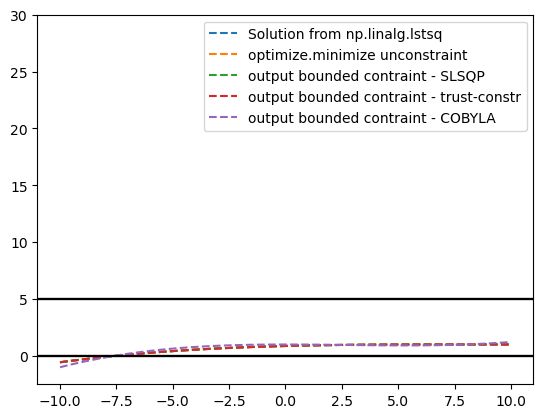

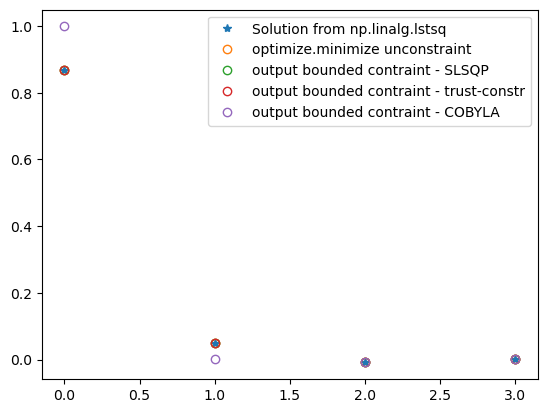

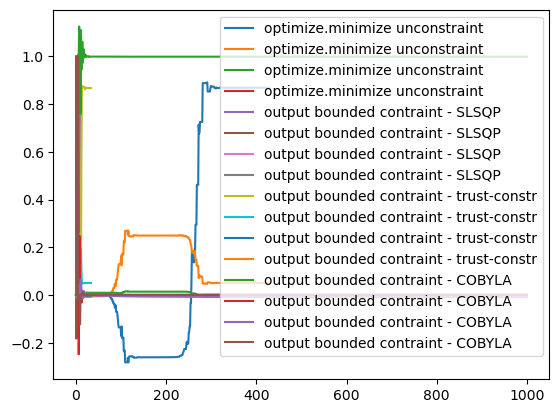

In [3]:
names = ['SLSQP','trust-constr','COBYLA']
print (cf)
print (len(history))
# print (history)
# print (type(history))
plt.figure(1)
plt.plot(xtest,ytest,'--',label='Solution from np.linalg.lstsq')
plt.figure(2)
plt.plot(c,'*',label='Solution from np.linalg.lstsq')

result = optimize.minimize(norm2_sq, x0 = np.zeros(Korder), method = 'Nelder-Mead', tol=1e-9, callback = save_xk, args = (A,y))
plot_result(result['x'],history, 'optimize.minimize unconstraint')
for n in names:
  cf = np.load('coeff_'+n+'.npy')
  history = np.load('history_'+n+'.npy')
  plot_result(cf,history,'output bounded contraint - '+n)

In [4]:
import numpy as np
files = ['coeff_COBYLA','coeff_SLSQP','coeff_trust-constr','history_COBYLA','history_SLSQP','history_trust-constr']
for a in files:
  load = np.load(a+'.npy')
  print(a,"=",load)
  np.savetxt(a+".csv",load,delimiter = ",")




# co_COBYLA = np.load('coeff_COBYLA.npy')
# co_SLSQP = np.load('coeff_SLSQP.npy')
# co_trust = np.load('coeff_trust.npy')
# his_COBYLA = np.load('history_COBYLA.npy')
# his_SLSQP = np.load('history_SLSQP.npy')
# his_trust = np.load('history_trust-constr.npy')


coeff_COBYLA = [ 9.98476476e-01  7.09106744e-04 -8.88233929e-03  1.10478761e-03]
coeff_SLSQP = [ 8.67640872e-01  5.06275021e-02 -6.48930801e-03  2.77664809e-04]
coeff_trust-constr = [ 8.67026765e-01  5.07287109e-02 -6.47575143e-03  2.75666997e-04]
history_COBYLA = [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00]
 ...
 [ 9.98476476e-01  7.09106744e-04 -8.88233929e-03  1.10478761e-03]
 [ 9.98476086e-01  7.09974633e-04 -8.88240192e-03  1.10479229e-03]
 [ 9.98476476e-01  7.09106744e-04 -8.88233929e-03  1.10478761e-03]]
history_SLSQP = [[ 8.10066508e-01  9.50454985e-01  2.91933452e-02 -1.09940587e-02]
 [-5.99863037e-02 -1.82763743e-01  1.58274840e-02  5.18789915e-03]
 [-9.05345341e-02  1.58238055e-01  8.98864617e-03 -1.81104897e-03]
 [ 4.35686657e-01  1.14968096e-01  4.53414073e-02 -6.70827690e-03]
 [ 1.00542442e+00  3.06748002e-01 -1.007738

[ 9.98476476e-01  7.09106744e-04 -8.88233929e-03  1.10478761e-03]
1001


AttributeError: 'numpy.ndarray' object has no attribute 'append'

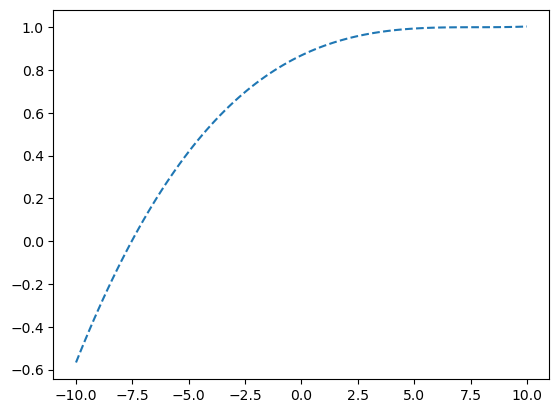

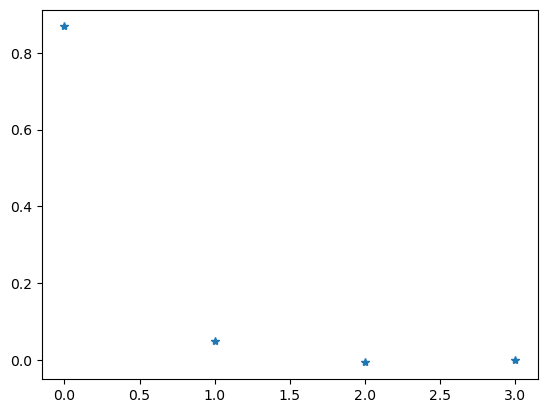

In [5]:
names = ['SLSQP','trust-constr','COBYLA']
print (cf)
print (len(history))
# print (history)
# print (type(history))
plt.figure(1)
plt.plot(xtest,ytest,'--',label='Solution from np.linalg.lstsq')
plt.figure(2)
plt.plot(c,'*',label='Solution from np.linalg.lstsq')

result = optimize.minimize(norm2_sq, x0 = np.zeros(Korder), method = 'Nelder-Mead', tol=1e-9, callback = save_xk, args = (A,y))
plot_result(result['x'],history, 'optimize.minimize unconstraint')
for n in names:
  cf = np.load('coeff_'+n+'.npy')
  history = np.load('history_'+n+'.npy')
  plot_result(cf,history,'output bounded contraint - '+n)
